In [24]:
using Plots
using NBInclude
using SparseArrays
using DataFrames
using LaTeXStrings
using ProgressBars

@nbinclude("Kagome First Band Approximation.ipynb"; regex=r"#.executeme");
@nbinclude(joinpath("../Braiding Utils.ipynb"));

In [2]:
Nx = 4
Ny = 2
N=Nx*Ny*3
cut_off = Nx*Ny
PN = [0,1,2,3]
U = 2
t1 = -1; L1 = 0.28; t2 = 0.3; L2 = 0.2;

In [3]:
sp_basis = NLevelBasis(N)
sp_matrix = dense(get_SP_H(Nx, Ny, t1, L1, t2, L2)).data
H1 = get_sp_op(sp_basis, sp_matrix);

In [4]:
E_sp = eigenenergies(dense(H1));

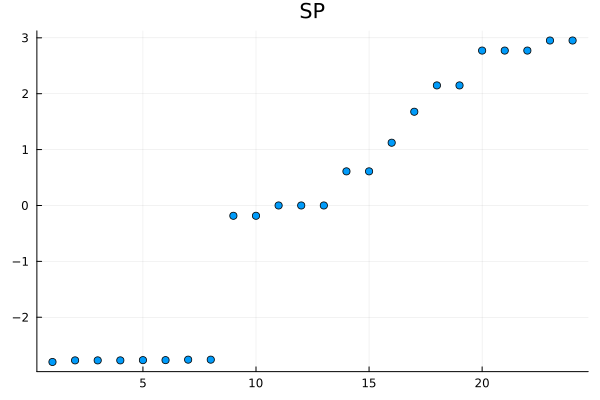

In [5]:
scatter(E_sp, legend=false, title="SP")

In [6]:
sub_states = get_sub_states(H1, cut_off);
basis_sub, P, Pt = get_projector_op(sub_states, sp_basis);
H1_sub = get_subspace_op(H1, P, Pt);
num_sub_list = get_num_sub_list(N, sp_basis, P, Pt);

In [7]:
states_mb = bosonstates(basis_sub, PN) 
basis_mb = ManyBodyBasis(basis_sub, states_mb)
H1_MB = get_mb_op(basis_mb, H1_sub);

In [8]:
E_mb = eigenenergies(dense((H1_MB'+H1_MB)/2));

In [9]:
@nbinclude("Kagome MB .ipynb"; regex=r"#.*executeme");
basis_cut_mb, basis_cut_sp = get_Bosonic_MB_Basis(cut_off, PN);

In [10]:
H1cut = SparseOperator(basis_cut_mb)
H1cut.data = H1_MB.data;

In [11]:
H_Int = Hubbard_Interaction(P, Pt, basis_cut_mb, cut_off, U);

In [19]:
Total_H = H1cut + H_Int

Operator(dim=165x165)
  basis: ManyBody(onebodybasis=NLevel(N=8), states:165)sparse([2, 3, 4, 5, 6, 7, 8, 9, 2, 3  …  149, 152, 154, 155, 158, 160, 161, 163, 164, 165], [2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14

In [20]:
number_mb_list_operators = get_num_mb_op(N, basis_cut_sp, num_sub_list, basis_cut_mb, basis_sub);

0.0%┣                                               ┫ 0/24 [00:00<00:00, -0s/it]
100.0%┣█████████████████████████████████████████┫ 24/24 [00:00<00:00, 22.0kit/s]
100.0%┣█████████████████████████████████████████┫ 24/24 [00:00<00:00, 11.1kit/s]


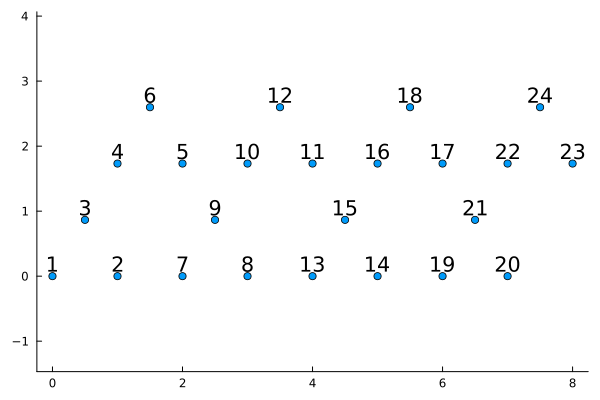

In [21]:
plot_kagome(Nx,Ny)

In [22]:
V0 = [4]; Imp_Site = [21]
Impurity_Data = Impurity(V0, Imp_Site)

Impurity([4.0], [21])

In [25]:
Impurity_H = Imp_H(Total_H, number_mb_list_operators, Impurity_Data)
Imp_H(Total_H, Sub_Number_MB_Operator_List, Impurity_Data)
H_total_imp = dense((Impurity_H+Impurity_H')/2);

LoadError: MethodError: no method matching +(::Operator{ManyBodyBasis{Vector{Int64}, NLevelBasis{Int64}, 0x124640f659a80575, UInt64}, ManyBodyBasis{Vector{Int64}, NLevelBasis{Int64}, 0x124640f659a80575, UInt64}, SparseMatrixCSC{ComplexF64, Int64}}, ::Vector{Operator{ManyBodyBasis{Vector{Int64}, NLevelBasis{Int64}, 0x124640f659a80575, UInt64}, ManyBodyBasis{Vector{Int64}, NLevelBasis{Int64}, 0x124640f659a80575, UInt64}, SparseMatrixCSC{ComplexF64, Int64}}})

[0mClosest candidates are:
[0m  +(::Any, ::Any, [91m::Any[39m, [91m::Any...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4moperators.jl:578[24m[39m
[0m  +([91m::SparseArrays.AbstractSparseMatrixCSC[39m, ::Array)
[0m[90m   @[39m [32mSparseArrays[39m [90mC:\Users\Can\AppData\Local\Programs\Julia-1.9.3\share\julia\stdlib\v1.9\SparseArrays\src\[39m[90m[4msparsematrix.jl:2068[24m[39m
[0m  +([91m::ChainRulesCore.Tangent{P}[39m, ::P) where P
[0m[90m   @[39m [33mChainRulesCore[39m [90mC:\Users\Can\.julia\packages\ChainRulesCore\0t04l\src\[39m[90m[4mtangent_arithmetic.jl:146[24m[39m
[0m  ...


In [69]:
E, V = eigenstates(dense(H_total_imp))
filtered_energies = get_filtered_energies(pn, E, V, basis_cut_mb);

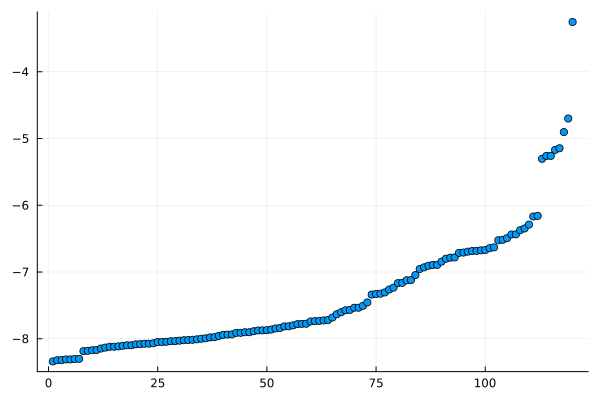

In [71]:
scatter(filtered_energies, legend=false)

In [72]:
pn = maximum(PN)
N_Pin = 1
NPhi0 = Int(Nx*Ny)
nu0 = 1/2 # The quasihole numbers depend on Laughlin fraction
NPhi = NPhi0-N_Pin
N_d = Int(NPhi - pn/nu0)
Degeneracy = Int((factorial(N_d + pn - 1) / (factorial(N_d) * factorial(pn - 1))) * (NPhi / pn))
println("Lattice: ",Nx,"x",Ny,
        "\nFilling Fraction = ",pn//NPhi0," (The Number of Quasiholes = ",(N_Pin+N_d),
        ")\nThe Number of Flux Quanta = ", NPhi,
        " (Delocalised Number = ", N_d,
        ")\nThe Total Number of Particle = ",pn,
        "\nThe Number of State of Ground Degeneracy = ",Degeneracy)

Lattice: 4x2
Filling Fraction = 3//8 (The Number of Quasiholes = 2)
The Number of Flux Quanta = 7 (Delocalised Number = 1)
The Total Number of Particle = 3
The Number of State of Ground Degeneracy = 7


In [74]:
r_hubbard_states = Restricted_Hubbard_States(V);

In [75]:
avg_density = Get_Avg_Density_List(Nx, Ny, Degeneracy, N, number_mb_list_operators, basis_cut_mb, r_hubbard_states);

In [76]:
x_co = OffsetArray(get_sites(Nx, Ny, a1_vec, a2_vec, Basis)[4], 1:N)
y_co = OffsetArray(get_sites(Nx, Ny, a1_vec, a2_vec, Basis)[5], 1:N);

In [81]:
z = exp_list1.(x_co, y_co)
z = collect(Iterators.flatten(z))
z[Imp_Site[1]]

3.94478189626254e-5

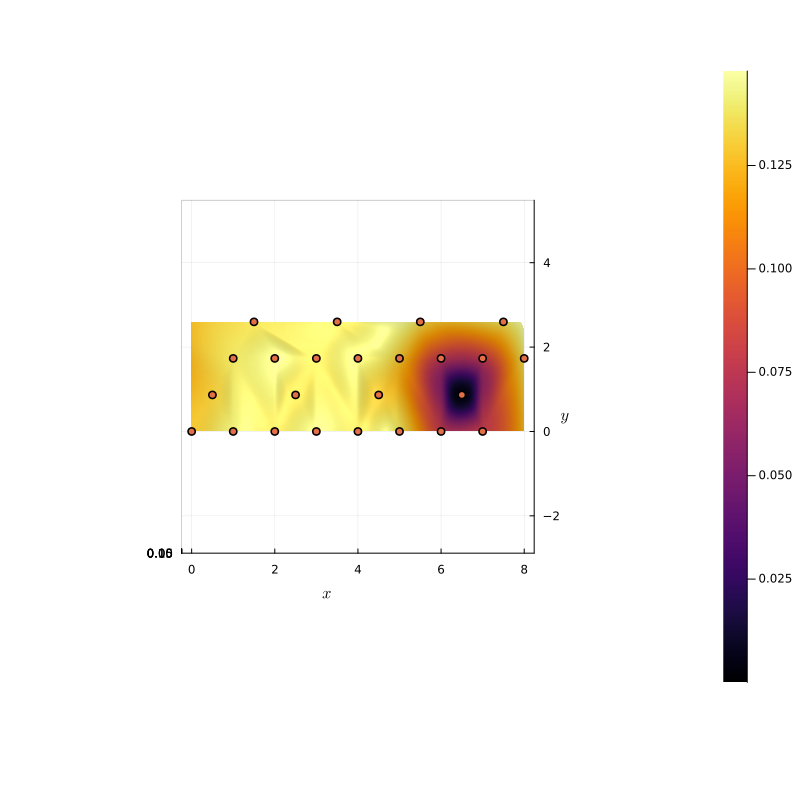

In [84]:
density = exp_list1.(x_co, y_co)
density = collect(Iterators.flatten(z))
surface(x_co,y_co,z,xlabel=L"$x$",ylabel=L"$y$", camera = (0,90), size=(800,800), aspect_ratio=:equal)

# Plot kagome as project to the plot of density profile
scatter!(x_co, y_co, 0. *density, camera=(0,90), legend=false)